In [38]:
import pandas as pd
import shapely
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt


#xi number of cahrging stations ti install on piint i

excel_data_df = pd.read_excel('Demand_data.xlsx')
excel_data_df=excel_data_df.dropna()

In [35]:
excel_data_df
#Demand_0

,Ref,geometry,Number of Charging Points,Number of Slow Charging Points,Number of Fast Charging Points,Number of Rapid Charging Points,Number of PoI,Number of Potential Locations,Distance from Centre,NEIGHBORS,...,x,y,Demand_0 (Full Electric),Demand_0 (PHEV),Demand_1 (Full Electric),Demand_1 (PHEV),Demand_2 (Full Electric),Demand_2 (PHEV),Demand_3 (Full Electric),Demand_3 (PHEV)
0,1.0,POLYGON ((-3.105818823440952 56.44296858524104...,0.0,0.0,0.0,0.0,0.0,0.0,8403.561223,"[2, 15, 16]",...,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,POLYGON ((-3.105961112538962 56.44786638257236...,0.0,0.0,0.0,0.0,0.0,0.0,8296.571785,"[1, 3, 15, 16, 17]",...,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,POLYGON ((-3.106103446316349 56.45276417577815...,0.0,0.0,0.0,0.0,0.0,0.0,8224.414999,"[2, 4, 16, 17, 18]",...,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,POLYGON ((-3.106245824792422 56.45766196485858...,0.0,0.0,0.0,0.0,0.0,0.0,8188.011805,"[3, 5, 17, 18, 19]",...,4.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,POLYGON ((-3.106388247986505 56.46255974981385...,0.0,0.0,0.0,0.0,0.0,0.0,8187.839098,"[4, 6, 18, 19, 20]",...,5.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,430.0,POLYGON ((-2.841505846300256 56.48913269331089...,0.0,0.0,0.0,0.0,0.0,0.0,8706.537927,"[415, 416, 417, 429, 431]",...,10.0,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
430,431.0,POLYGON ((-2.841614325647596 56.49403083838651...,0.0,0.0,0.0,0.0,0.0,0.0,8908.916529,"[416, 417, 418, 430, 432]",...,11.0,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
431,432.0,POLYGON ((-2.841722839098455 56.49892897943724...,0.0,0.0,0.0,0.0,0.0,0.0,9139.388454,"[417, 418, 419, 431, 433]",...,12.0,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
432,433.0,POLYGON ((-2.841831386667599 56.50382711646336...,0.0,0.0,0.0,0.0,0.0,0.0,9395.886624,"[418, 419, 420, 432, 434]",...,13.0,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[Text(0.5, 1.0, 'Number of Potential Locations')]

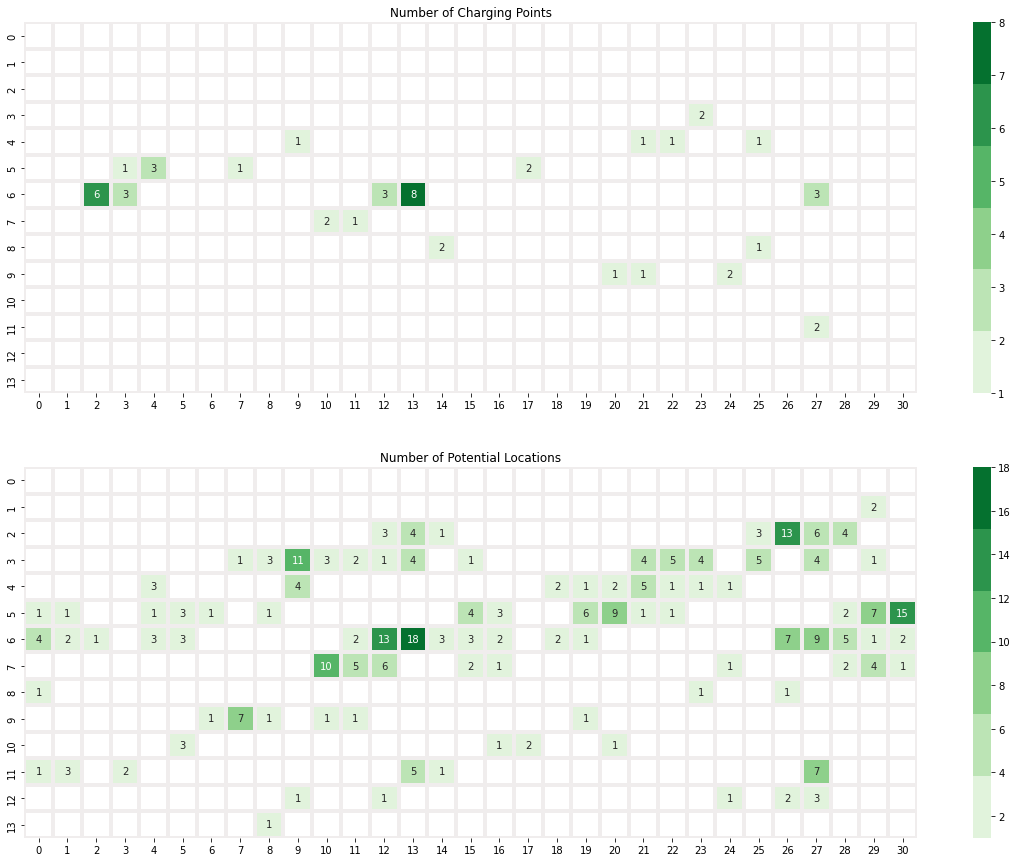

In [5]:
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

#####################################################################
#Create array of 14x31 and fill it with Number of Potential Locations
Index= [i for i in range(14)]
Cols = [i for i in range(31)]
alist=excel_data_df['Number of Charging Points']
alist= pd.Series(alist).values
alist = alist.reshape(14,31)
#Put it into a DF
ncp_df = DataFrame(alist,index=Index, columns=Cols)
ncp_values = ncp_df.to_numpy(dtype=float)


#####################################################################
#Create array of 14x31 and fill it with Number of Potential Locations
Index= [i for i in range(14)]
Cols = [i for i in range(31)]
alist=excel_data_df['Number of Potential Locations']
alist= pd.Series(alist).values
alist = alist.reshape(14,31)
#Put it into a DF
npl_df = DataFrame(alist,index=Index, columns=Cols)
npl_values = npl_df.to_numpy(dtype=float)


#####################################################################
fig, ax =plt.subplots(2,1, figsize=(20, 15))
colormap = sns.color_palette("Greens")
sns.heatmap(ncp_df, annot=True, cmap=colormap, ax=ax[0], mask=ncp_values == 0, linewidths=4, linecolor='#f0eded').set(title='Number of Charging Points')
sns.heatmap(npl_df, annot=True, cmap=colormap, ax=ax[1], mask=npl_values == 0, linewidths=4, linecolor='#f0eded').set(title='Number of Potential Locations')


<AxesSubplot: >

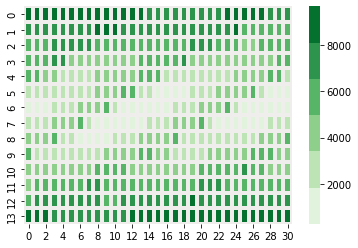

In [8]:
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

#####################################################################
#Create array of 14x31 and fill it with Number of Potential Locations
Index= [i for i in range(14)]
Cols = [i for i in range(31)]
alist=excel_data_df['Distance from Centre']
alist= pd.Series(alist).values
alist = alist.reshape(14,31)
#Put it into a DF
dfc_df = DataFrame(alist,index=Index, columns=Cols)
dfc_values = dfc_df.to_numpy(dtype=float)

#####################################################################

sns.heatmap(dfc_df, annot=False, cmap=colormap, linewidths=4, linecolor='#f0eded')


________________________________________________

In [36]:
excel_data_df['geometry'] = excel_data_df['geometry'].apply(wkt.loads)


In [40]:
excel_data_df['geometry'] = gpd.GeoSeries.from_wkt(excel_data_df['geometry'])


In [41]:
gdf = gpd.GeoDataFrame(excel_data_df, geometry='geometry')

print(gdf.head())

   Ref                                           geometry  \
0  1.0  POLYGON ((-3.10582 56.44297, -3.10596 56.44787...   
1  2.0  POLYGON ((-3.10596 56.44787, -3.10610 56.45276...   
2  3.0  POLYGON ((-3.10610 56.45276, -3.10625 56.45766...   
3  4.0  POLYGON ((-3.10625 56.45766, -3.10639 56.46256...   
4  5.0  POLYGON ((-3.10639 56.46256, -3.10653 56.46746...   

   Number of Charging Points  Number of Slow Charging Points  \
0                        0.0                             0.0   
1                        0.0                             0.0   
2                        0.0                             0.0   
3                        0.0                             0.0   
4                        0.0                             0.0   

   Number of Fast Charging Points  Number of Rapid Charging Points  \
0                             0.0                              0.0   
1                             0.0                              0.0   
2                             0.0     

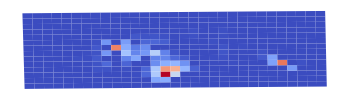

In [45]:
gdf.plot(column='Demand_3', cmap='coolwarm', legend=False)
plt.axis('off')
plt.show()


In [23]:
import contextily as ctx
import matplotlib.colors as mcolors
import numpy as np

import holoviews as hv
from holoviews import dim, opts


colors = [(1,0,0,c) for c in np.linspace(0,1,100)]
cmapred = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=5)
colors = [(0,0,1,c) for c in np.linspace(0,1,100)]
cmapblue = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=5)


(-3.121621312895639, -2.81788119008772, 56.43943285837387, 56.51721884945166)

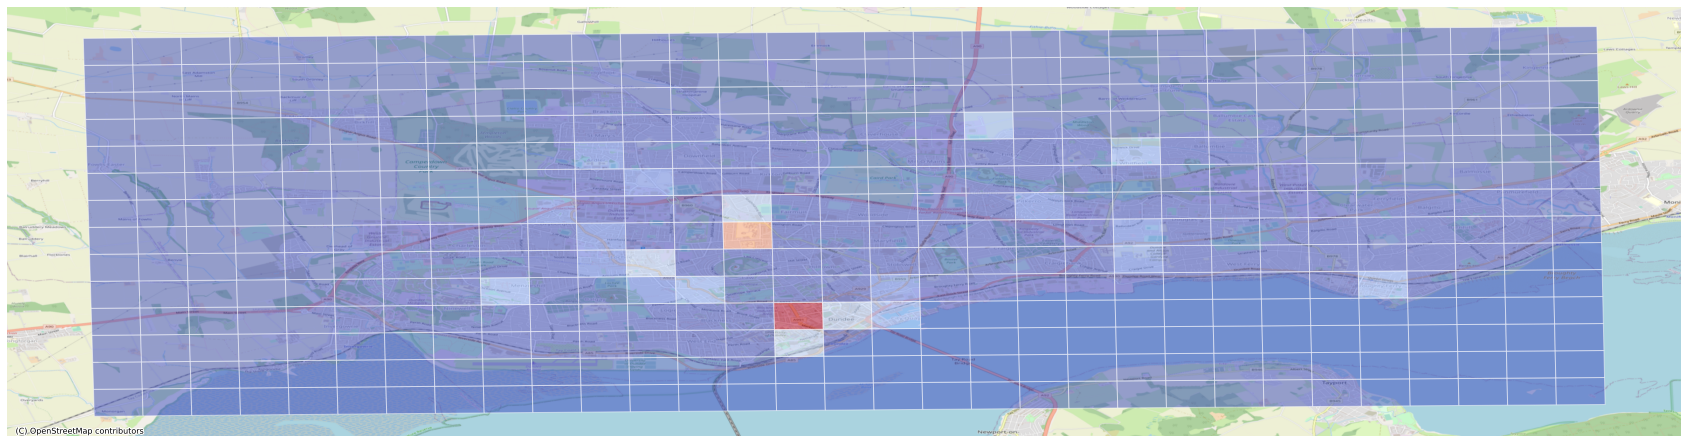

In [26]:
# axes = myPoly.plot(figsize=(30,20), cmap=cmapblue, edgecolor='white', alpha=0.31, color=dim('Number of Charging Points'))
# print("------------------")
# print(axes)
# print("------------------")
# ctx.add_basemap(axes, source=ctx.providers.OpenStreetMap.Mapnik,crs='EPSG:4326')
# axes.axis('off')



axes = gdf.plot(figsize=(30,20), column='Number of Charging Points', cmap='coolwarm', legend=False, edgecolor='white', alpha=0.5)
ctx.add_basemap(axes, source=ctx.providers.OpenStreetMap.Mapnik,crs='EPSG:4326')
axes.axis('off')


In [ ]:
fig, ax = plt.subplots(figsize=(16, 16))
ax.axis(ghent_ext)
cx.add_basemap(ax)

In [1]:
pip install holoviews

Note: you may need to restart the kernel to use updated packages.
